# International football resluts from 1872-2017

In [40]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('figure', figsize=(15, 5))

In [41]:
results = pd.read_csv('./results.csv')
results.dtypes
display(results)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
41238,2019-10-20,Lesotho,Zimbabwe,0,0,African Nations Championship qualifying,Lesotho,Lesotho,False
41239,2019-10-20,Guinea,Senegal,1,0,African Nations Championship qualifying,Conakry,Guinea,False
41240,2019-10-20,Mali,Mauritania,2,0,African Nations Championship qualifying,Mali,Mali,False
41241,2019-10-20,Burkina Faso,Ghana,0,0,African Nations Championship qualifying,Burkina Faso,Burkina Faso,False


In [42]:
def home_away_draws(df): #returns number of home wins, away wins, draws and total games played 
    home_wins=len(df[df.away_score<df.home_score])
    away_wins=len(df[df.away_score>df.home_score])
    draws=len(df[df.away_score==df.home_score])
    total_games_played=home_wins+away_wins+draws
    avg_home=df['home_score'].mean()
    avg_away=df['away_score'].mean()
    return home_wins,away_wins,draws,total_games_played,avg_home,avg_away

In [43]:
print(len(results['tournament'].unique()))
print(len(results['country'].unique()))
print(len(results['city'].unique()))

112
266
2002


##### I checked the same stats for Non-friendly matches and it confirms the same relations above

### Major Tournaments
FIFA (Intercontinental competitions)  
AFC (Asian competitions)  
CAF (African competitions)  
CONCACAF (North American, Central American, and Caribbean competitions) (NAFU+CCCF)  
CONMEBOL (South American competitions)  
OFC (Oceanian competitions)  
UEFA (European competitions)  

I have just picked out 'Major' tournaments. The critera for major is debatable and I would love to see a discussion about it

https://en.wikipedia.org/wiki/List_of_association_football_competitions

In [44]:
major_tournaments = ['FIFA World Cup','Confederations Cup','Oceania Nations Cup','CCCF Championship','AFC Asian Cup','Copa América','Gold Cup','UEFA Euro','NAFU Championship','African Cup of Nations']

major=results.loc[results['tournament'].isin(major_tournaments) , :]

In [45]:
m_home_wins, m_away_wins, m_draws, m_total_games_played, m_home_score_avg, m_away_score_avg = home_away_draws(major)
print(f'Away wins: {m_away_wins}')
print(f'Home wins: {m_home_wins}')
print(f'Draws: {m_draws}')
print(f'Home side goal per game: {m_home_score_avg}')
print(f'Away side goal per game: {m_away_score_avg}')

print(m_home_wins/m_total_games_played)
print(m_away_wins/m_total_games_played)
print(m_draws/m_total_games_played)

Away wins: 1117
Home wins: 1798
Draws: 842
Home side goal per game: 1.6766036731434655
Away side goal per game: 1.2086771360127762
0.4785733297844024
0.2973116848549375
0.2241149853606601


In [46]:
#Matches that were played in either home or away grounds (non-neutral games)
major_nn = major[major['neutral']==False]
nn_m_home_wins, nn_m_away_wins, nn_m_draws, nn_m_total_games_played, nn_m_home_score_avg, nn_m_away_score_avg = home_away_draws(major_nn)

print(f'Away wins: {nn_m_away_wins}')
print(f'Home wins: {nn_m_home_wins}')
print(f'Draws: {nn_m_draws}')
print(f'Home side goal per game: {nn_m_home_score_avg}')
print(f'Away side goal per game: {nn_m_away_score_avg}')

print(nn_m_home_wins/nn_m_total_games_played)
print(nn_m_away_wins/nn_m_total_games_played)
print(nn_m_draws/nn_m_total_games_played)

Away wins: 174
Home wins: 548
Draws: 190
Home side goal per game: 1.9989035087719298
Away side goal per game: 0.9528508771929824
0.6008771929824561
0.19078947368421054
0.20833333333333334


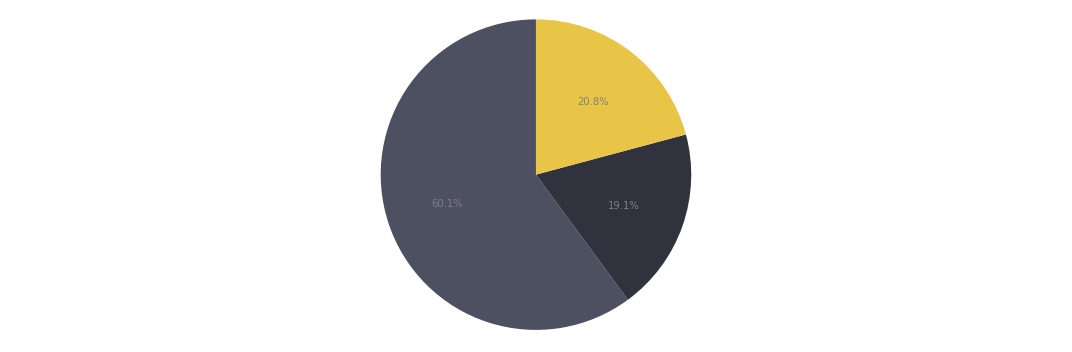

In [47]:
xn=[nn_m_home_wins/nn_m_total_games_played,nn_m_away_wins/nn_m_total_games_played,nn_m_draws/nn_m_total_games_played]
labels = ['Home wins', 'Away wins', 'Draws']
sizes = xn
colors = ['#4d5061','#30323d','#e8c547']
 
fig1, ax1 = plt.subplots()
patches, texts, autotexts = ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
for text in texts:
    text.set_color('white')
for autotext in autotexts:
    autotext.set_color('grey')# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [48]:
#ost played stadiums 

print(major['city'].value_counts()[:5])
print(major['country'].value_counts()[:5])

Montevideo      101
Santiago         97
Buenos Aires     96
Lima             80
Cairo            66
Name: city, dtype: int64
United States    393
Brazil           211
France           168
Argentina        160
Chile            155
Name: country, dtype: int64


In [49]:
Most played staiums 
goal graphs
rate attack and defense of teams based on years 


SyntaxError: invalid syntax (<ipython-input-49-d4683bd84d6a>, line 1)

In [23]:
print(len(major.loc[major['neutral']==True,:]))
print(len(major.loc[major['neutral']==False,:]))

2845
912


In [24]:
major['tournament'].unique()

array(['Copa América', 'FIFA World Cup', 'CCCF Championship',
       'NAFU Championship', 'AFC Asian Cup', 'African Cup of Nations',
       'UEFA Euro', 'Oceania Nations Cup', 'Gold Cup',
       'Confederations Cup'], dtype=object)

In [54]:
x=major[major['tournament']=="FIFA World Cup"]
x

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
1300,1930-07-,Belgium,United States,0,3,FIFA World Cup,Montevideo,Uruguay,True
1301,1930-07-,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True
1302,1930-07-,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True
1303,1930-07-,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True
1304,1930-07-,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True
1305,1930-07-,Chile,Mexico,3,0,FIFA World Cup,Montevideo,Uruguay,True
1306,1930-07-,Bolivia,Yugoslavia,0,4,FIFA World Cup,Montevideo,Uruguay,True
1307,1930-07-,Paraguay,United States,0,3,FIFA World Cup,Montevideo,Uruguay,True
1309,1930-07-,Uruguay,Peru,1,0,FIFA World Cup,Montevideo,Uruguay,False
1310,1930-07-,Argentina,Mexico,6,3,FIFA World Cup,Montevideo,Uruguay,True


In [51]:
major['date']=major['date'].apply(lambda x : x[:7])

/home/izanami/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [52]:
pd.set_option('max_rows',3800)
major

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
428,1916-07-,Chile,Uruguay,0,4,Copa América,Buenos Aires,Argentina,True
430,1916-07-,Argentina,Chile,6,1,Copa América,Buenos Aires,Argentina,False
431,1916-07-,Brazil,Chile,1,1,Copa América,Buenos Aires,Argentina,True
432,1916-07-,Argentina,Brazil,1,1,Copa América,Buenos Aires,Argentina,False
434,1916-07-,Brazil,Uruguay,1,2,Copa América,Buenos Aires,Argentina,True
436,1916-07-,Argentina,Uruguay,0,0,Copa América,Avellaneda,Argentina,False
461,1917-09-,Uruguay,Chile,4,0,Copa América,Montevideo,Uruguay,False
462,1917-10-,Argentina,Brazil,4,2,Copa América,Montevideo,Uruguay,True
463,1917-10-,Argentina,Chile,1,0,Copa América,Montevideo,Uruguay,True
466,1917-10-,Uruguay,Brazil,4,0,Copa América,Montevideo,Uruguay,False


In [ ]:
pd.set_option('max_rows',3800)
major